Example 4
=========


This example illustrates how the Low Impact Development (LID) modeling feature works. 

The data file represents a 29 acre mixed-use subdivision that has been divided into 9 subcatchments. 

Six different types of LID processes have been defined and deployed within the subcatchments:
- rain barrels and an infiltration trench in subcatchment S1, 
- street planters in S4, 
- a green roof and permeable pavement area in S5, and 
- vegetative swales in subcatchments Swale3, Swale4, and Swale6.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from swmm_api import SwmmOutput, SwmmReport
from swmm_api.input_file.macros.plotting_map import *
from swmm_api.run_swmm import swmm5_run_progress
from swmm_api.run_swmm.run_temporary import swmm5_run_temporary

In [4]:
inp = SwmmInput('Example4.inp')

In [16]:
inp.SUBCATCHMENTS.frame

rain_gage  outlet  area  imperviousness   width  slope  curb_length  \
name                                                                         
S1      RainGage  Swale4  4.55            56.8  1587.0    2.0          0.0   
S2      RainGage      O1  4.74            63.0  1653.0    2.0          0.0   
S3      RainGage  Swale3  3.70            39.5  1456.0    3.1          0.0   
S4      RainGage  Swale4  6.82            49.9  2331.0    3.1          0.0   
S5      RainGage      O1  6.60            87.7  1670.0    2.0          0.0   
S6      RainGage  Swale6  2.58             0.0   907.0    3.1          0.0   
Swale3  RainGage  Swale4  0.33             0.0    50.0    0.5          0.0   
Swale4  RainGage  Swale6  0.50             0.0    50.0    0.5          0.0   
Swale6  RainGage      O1  0.41             0.0    50.0    0.5          0.0   

        snow_pack  
name               
S1            NaN  
S2            NaN  
S3            NaN  
S4            NaN  
S5            NaN  
S6            NaN  
Swale3        NaN  
Swale4        NaN  
Swale6        NaN

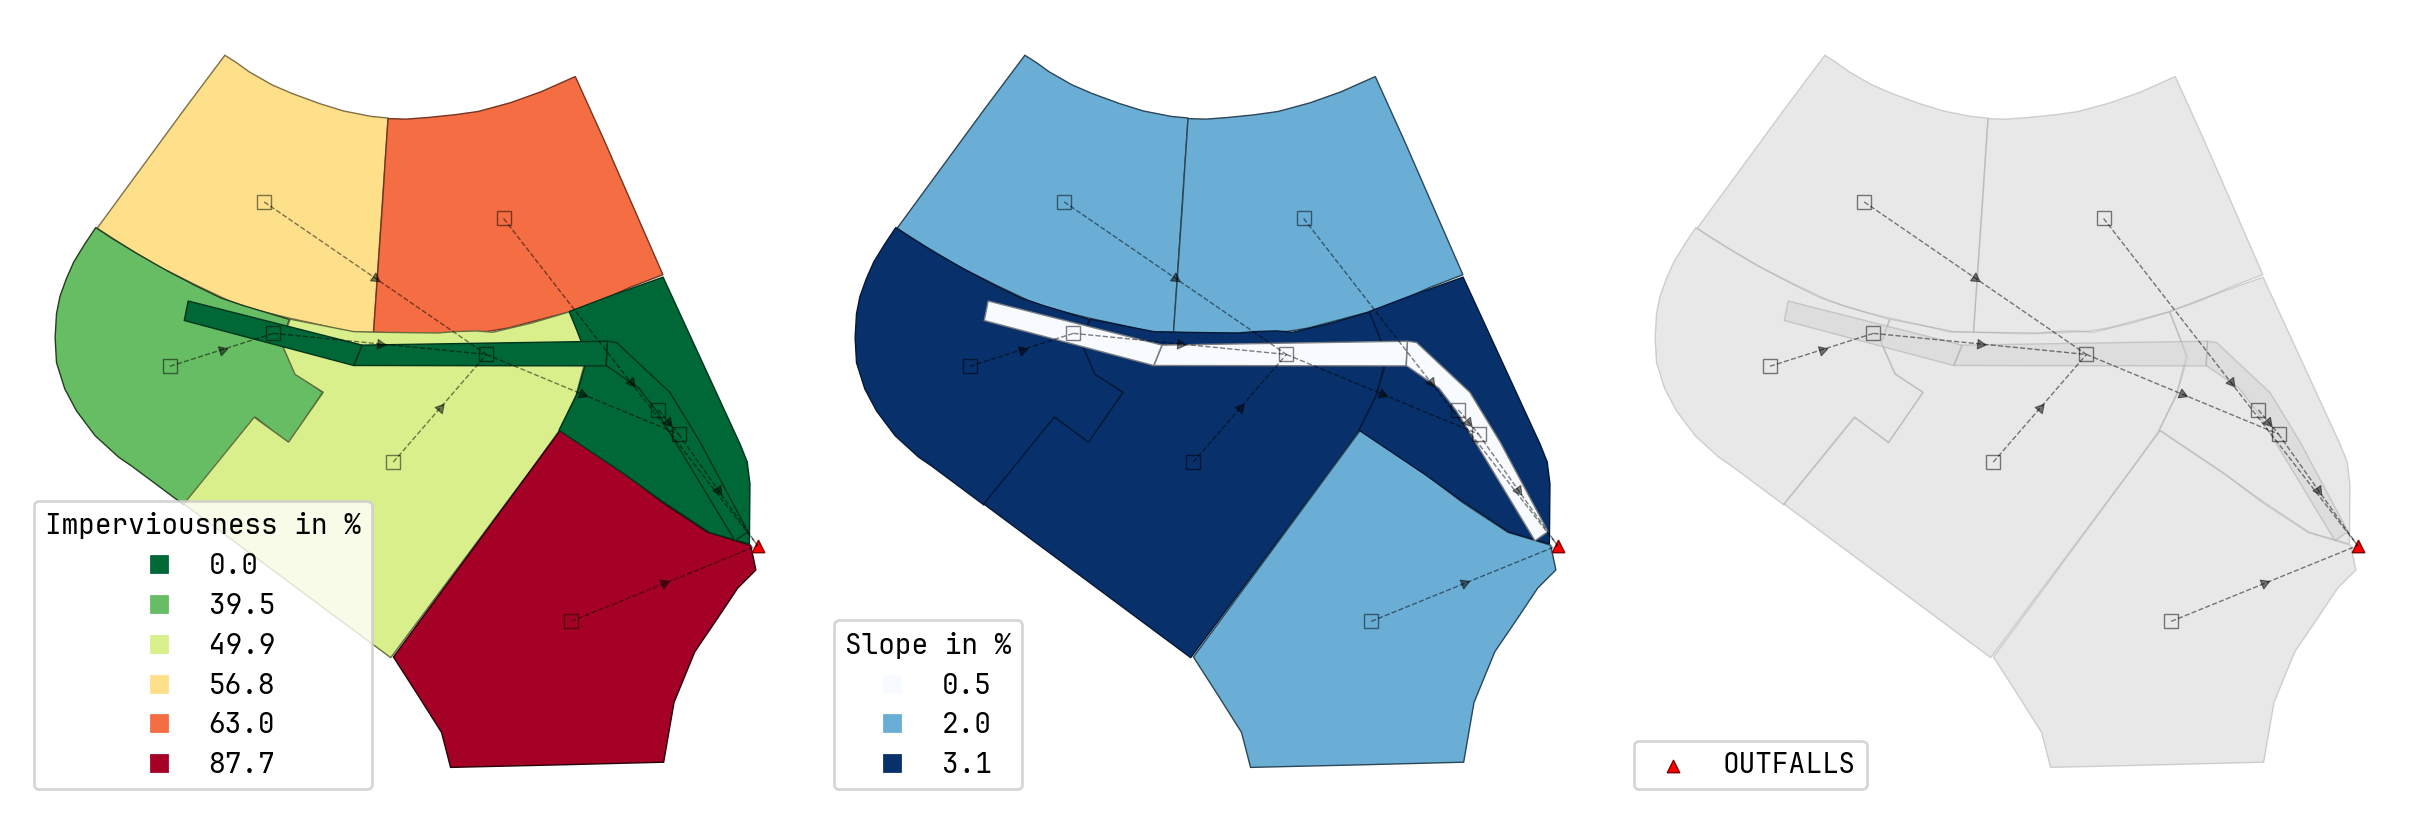

In [35]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)

axes[0].set_axis_off()
axes[0].set_aspect('equal')
add_node_map(axes[0], inp, add_kind_legend=False)
add_subcatchment_map(axes[0], inp, add_connector_arrows=True, values_dict={sc.name: sc.imperviousness for sc in inp.SUBCATCHMENTS.values()}, cmap='RdYlGn_r', alpha=1, discrete=True, colorbar_kwargs={'title': 'Imperviousness in %', 'loc': 'lower left'})
# ---
axes[1].set_axis_off()
axes[1].set_aspect('equal')
add_node_map(axes[1], inp, add_kind_legend=False)
add_subcatchment_map(axes[1], inp, add_connector_arrows=True, values_dict={sc.name: sc.slope for sc in inp.SUBCATCHMENTS.values()}, cmap='Blues', alpha=1, colorbar_kwargs={'title': 'Slope in %'}, discrete=True)
# ---
axes[2].set_axis_off()
axes[2].set_aspect('equal')
add_node_map(axes[2], inp)
add_subcatchment_map(axes[2], inp, add_connector_arrows=True)

# from matplotlib._layoutgrid import plot_children
# plot_children(fig)


After loading the example, select the LID Controls category from the Data Browser to see what types of LID controls and their design parameters have been defined for the project. 

Then use the View | Query command to locate subcatchments that have been assigned LID controls or select LID Usage as the Subcatchment Theme to view on the map. 
Bring up the Property Editor for a selected subcatchment and click on the LID Controls property to see how a particular LID process was deployed within the subcatchment.

In [36]:
inp.LID_CONTROLS.keys()

dict_keys(['GreenRoof', 'PorousPave', 'Planters', 'InfilTrench', 'RainBarrels', 'Swale'])

In [49]:
gr = inp.LID_CONTROLS['GreenRoof']
print(gr)
import pprint
pprint.pprint(gr.layer_dict)

LIDControl(name='GreenRoof', lid_kind='BC', layer_dict={'SURFACE': Surface(StorHt=0.0, VegFrac=0.0, Rough=0.1, Slope=1.0, Xslope=5.0), 'SOIL': Soil(Thick=3.0, Por=0.5, FC=0.2, WP=0.1, Ksat=0.5, Kcoeff=10.0, Suct=3.5), 'STORAGE': Storage(Height=1.0, Vratio=0.75, Seepage=0.0, Vclog=0, Covrd=True), 'DRAIN': Drain(Coeff=1.0, Expon=0.5, Offset=0.0, Delay='6', open_level=nan, close_level=nan, Qcurve=nan)})
{'DRAIN': Drain(Coeff=1.0, Expon=0.5, Offset=0.0, Delay='6', open_level=nan, close_level=nan, Qcurve=nan),
 'SOIL': Soil(Thick=3.0, Por=0.5, FC=0.2, WP=0.1, Ksat=0.5, Kcoeff=10.0, Suct=3.5),
 'STORAGE': Storage(Height=1.0, Vratio=0.75, Seepage=0.0, Vclog=0, Covrd=True),
 'SURFACE': Surface(StorHt=0.0, VegFrac=0.0, Rough=0.1, Slope=1.0, Xslope=5.0)}


In [40]:
print(inp.LID_CONTROLS['GreenRoof'].to_inp_line())

GreenRoof BC
GreenRoof SURFACE  0 0 0.1 1 5
GreenRoof SOIL     3 0.5 0.2 0.1 0.5 10 3.5
GreenRoof STORAGE  1 0.75 0 0 YES
GreenRoof DRAIN    1 0.5 0 6



In [20]:
inp.LID_USAGE.frame

n_replicate      area  width  saturation_init  \
subcatchment lid                                                         
S1           InfilTrench           4     532.0  133.0              0.0   
             RainBarrels          32       5.0    0.0              0.0   
S4           Planters             30     500.0    0.0              0.0   
S5           GreenRoof             1   18400.0  136.0              0.0   
             PorousPave            1  232872.0  683.0              0.0   
Swale3       Swale                 1   14374.8   45.0              0.0   
Swale4       Swale                 1   21780.0   45.0              0.0   
Swale6       Swale                 1   17859.6   45.0              0.0   

                          impervious_portion  route_to_pervious  \
subcatchment lid                                                  
S1           InfilTrench                40.0                  0   
             RainBarrels                17.0                  1   
S4           Planters                   80.0                  0   
S5           GreenRoof                   0.0                  0   
             PorousPave                  0.0                  0   
Swale3       Swale                       0.0                  0   
Swale4       Swale                       0.0                  0   
Swale6       Swale                       0.0                  0   

                          fn_lid_report  drain_to  from_pervious  
subcatchment lid                                                  
S1           InfilTrench            NaN       NaN            NaN  
             RainBarrels            NaN       NaN            NaN  
S4           Planters               NaN       NaN            NaN  
S5           GreenRoof              NaN       NaN            NaN  
             PorousPave             NaN       NaN            NaN  
Swale3       Swale                  NaN       NaN            NaN  
Swale4       Swale                  NaN       NaN            NaN  
Swale6       Swale                  NaN       NaN            NaN

Run the example and view a summary of LID performance in the LID Results section of the Status Report. 

Edit one of the LID units deployed within a subcatchment (e.g., the green roof in subcatchment S5) to produce a detailed report file for it. 

Then re-run the example and open the report file with a text editor (or with Excel) to view a detailed time history of water fluxes and storage levels in the LID unit.

In [50]:
inp.LID_USAGE[('S5', 'GreenRoof')].fn_lid_report = 'lid_report_export.txt'

In [51]:
with swmm5_run_temporary(inp.copy(), run=swmm5_run_progress, label='example_run_swmm') as res:
    out = res.out  # type: SwmmOutput
    rpt = res.rpt  # type: SwmmReport
    lid_rpt = res.lid_rpt_dict

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmpcmwa3kku/example_run_swmm.inp:   0%|          | 0/10…

In [55]:
rpt.lid_control_summary

LID  Control  No. of_Units  Unit_Area  Unit_Width  \
Subcatchment                                                              
S1            RainBarrels       32           5.0        0.0        0.08   
S1            InfilTrench        4         532.0      133.0        1.07   
S4               Planters       30         500.0        0.0        5.05   
S5              GreenRoof        1       18400.0      136.0        6.40   
S5             PorousPave        1      232872.0      683.0       81.00   
Swale3              Swale        1       14374.8       45.0      100.00   
Swale4              Swale        1       21780.0       45.0      100.00   
Swale6              Swale        1       17859.6       45.0      100.00   

              % Area_Covered  % Imperv_Treated  % Perv_Treated  
Subcatchment                                                    
S1                      17.0               0.0             NaN  
S1                      40.0               0.0             NaN  
S4                      80.0               0.0             NaN  
S5                       0.0               0.0             NaN  
S5                       0.0               0.0             NaN  
Swale3                   0.0               0.0             NaN  
Swale4                   0.0               0.0             NaN  
Swale6                   0.0               0.0             NaN

In [56]:
rpt.lid_control_summary

LID  Control  No. of_Units  Unit_Area  Unit_Width  \
Subcatchment                                                              
S1            RainBarrels       32           5.0        0.0        0.08   
S1            InfilTrench        4         532.0      133.0        1.07   
S4               Planters       30         500.0        0.0        5.05   
S5              GreenRoof        1       18400.0      136.0        6.40   
S5             PorousPave        1      232872.0      683.0       81.00   
Swale3              Swale        1       14374.8       45.0      100.00   
Swale4              Swale        1       21780.0       45.0      100.00   
Swale6              Swale        1       17859.6       45.0      100.00   

              % Area_Covered  % Imperv_Treated  % Perv_Treated  
Subcatchment                                                    
S1                      17.0               0.0             NaN  
S1                      40.0               0.0             NaN  
S4                      80.0               0.0             NaN  
S5                       0.0               0.0             NaN  
S5                       0.0               0.0             NaN  
Swale3                   0.0               0.0             NaN  
Swale4                   0.0               0.0             NaN  
Swale6                   0.0               0.0             NaN

In [54]:
lid_rpt[('S5', 'GreenRoof')]

Elapsed_Time_Hours  Total_Inflow_in/hr  Total_Evap_in/hr  \
2007-01-01 00:01:00               0.017                0.29            0.0000   
2007-01-01 00:02:00               0.033                0.29            0.0000   
2007-01-01 00:03:00               0.050                0.29            0.0000   
2007-01-01 00:04:00               0.067                0.29            0.0000   
2007-01-01 00:05:00               0.083                0.29            0.0000   
...                                 ...                 ...               ...   
2007-01-01 11:56:00              11.933                0.00            0.0083   
2007-01-01 11:57:00              11.950                0.00            0.0083   
2007-01-01 11:58:00              11.967                0.00            0.0083   
2007-01-01 11:59:00              11.983                0.00            0.0083   
2007-01-01 12:00:00              12.000                0.00            0.0083   

                     Surface_Infil_in/hr  Pavement_Perc_in/hr  \
2007-01-01 00:01:00                 0.29                  0.0   
2007-01-01 00:02:00                 0.29                  0.0   
2007-01-01 00:03:00                 0.29                  0.0   
2007-01-01 00:04:00                 0.29                  0.0   
2007-01-01 00:05:00                 0.29                  0.0   
...                                  ...                  ...   
2007-01-01 11:56:00                 0.00                  0.0   
2007-01-01 11:57:00                 0.00                  0.0   
2007-01-01 11:58:00                 0.00                  0.0   
2007-01-01 11:59:00                 0.00                  0.0   
2007-01-01 12:00:00                 0.00                  0.0   

                     Soil_Perc_in/hr  Storage_Exfil_in/hr  \
2007-01-01 00:01:00              0.0                  0.0   
2007-01-01 00:02:00              0.0                  0.0   
2007-01-01 00:03:00              0.0                  0.0   
2007-01-01 00:04:00              0.0                  0.0   
2007-01-01 00:05:00              0.0                  0.0   
...                              ...                  ...   
2007-01-01 11:56:00              0.0                  0.0   
2007-01-01 11:57:00              0.0                  0.0   
2007-01-01 11:58:00              0.0                  0.0   
2007-01-01 11:59:00              0.0                  0.0   
2007-01-01 12:00:00              0.0                  0.0   

                     Surface_Runoff_in/hr  Drain_OutFlow_in/hr  \
2007-01-01 00:01:00                   0.0                  0.0   
2007-01-01 00:02:00                   0.0                  0.0   
2007-01-01 00:03:00                   0.0                  0.0   
2007-01-01 00:04:00                   0.0                  0.0   
2007-01-01 00:05:00                   0.0                  0.0   
...                                   ...                  ...   
2007-01-01 11:56:00                   0.0                  0.0   
2007-01-01 11:57:00                   0.0                  0.0   
2007-01-01 11:58:00                   0.0                  0.0   
2007-01-01 11:59:00                   0.0                  0.0   
2007-01-01 12:00:00                   0.0                  0.0   

                     Surface_Level_inches  Pavement_Level_inches  \
2007-01-01 00:01:00                   0.0                    0.0   
2007-01-01 00:02:00                   0.0                    0.0   
2007-01-01 00:03:00                   0.0                    0.0   
2007-01-01 00:04:00                   0.0                    0.0   
2007-01-01 00:05:00                   0.0                    0.0   
...                                   ...                    ...   
2007-01-01 11:56:00                   0.0                    0.0   
2007-01-01 11:57:00                   0.0                    0.0   
2007-01-01 11:58:00                   0.0                    0.0   
2007-01-01 11:59:00                   0.0                    

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

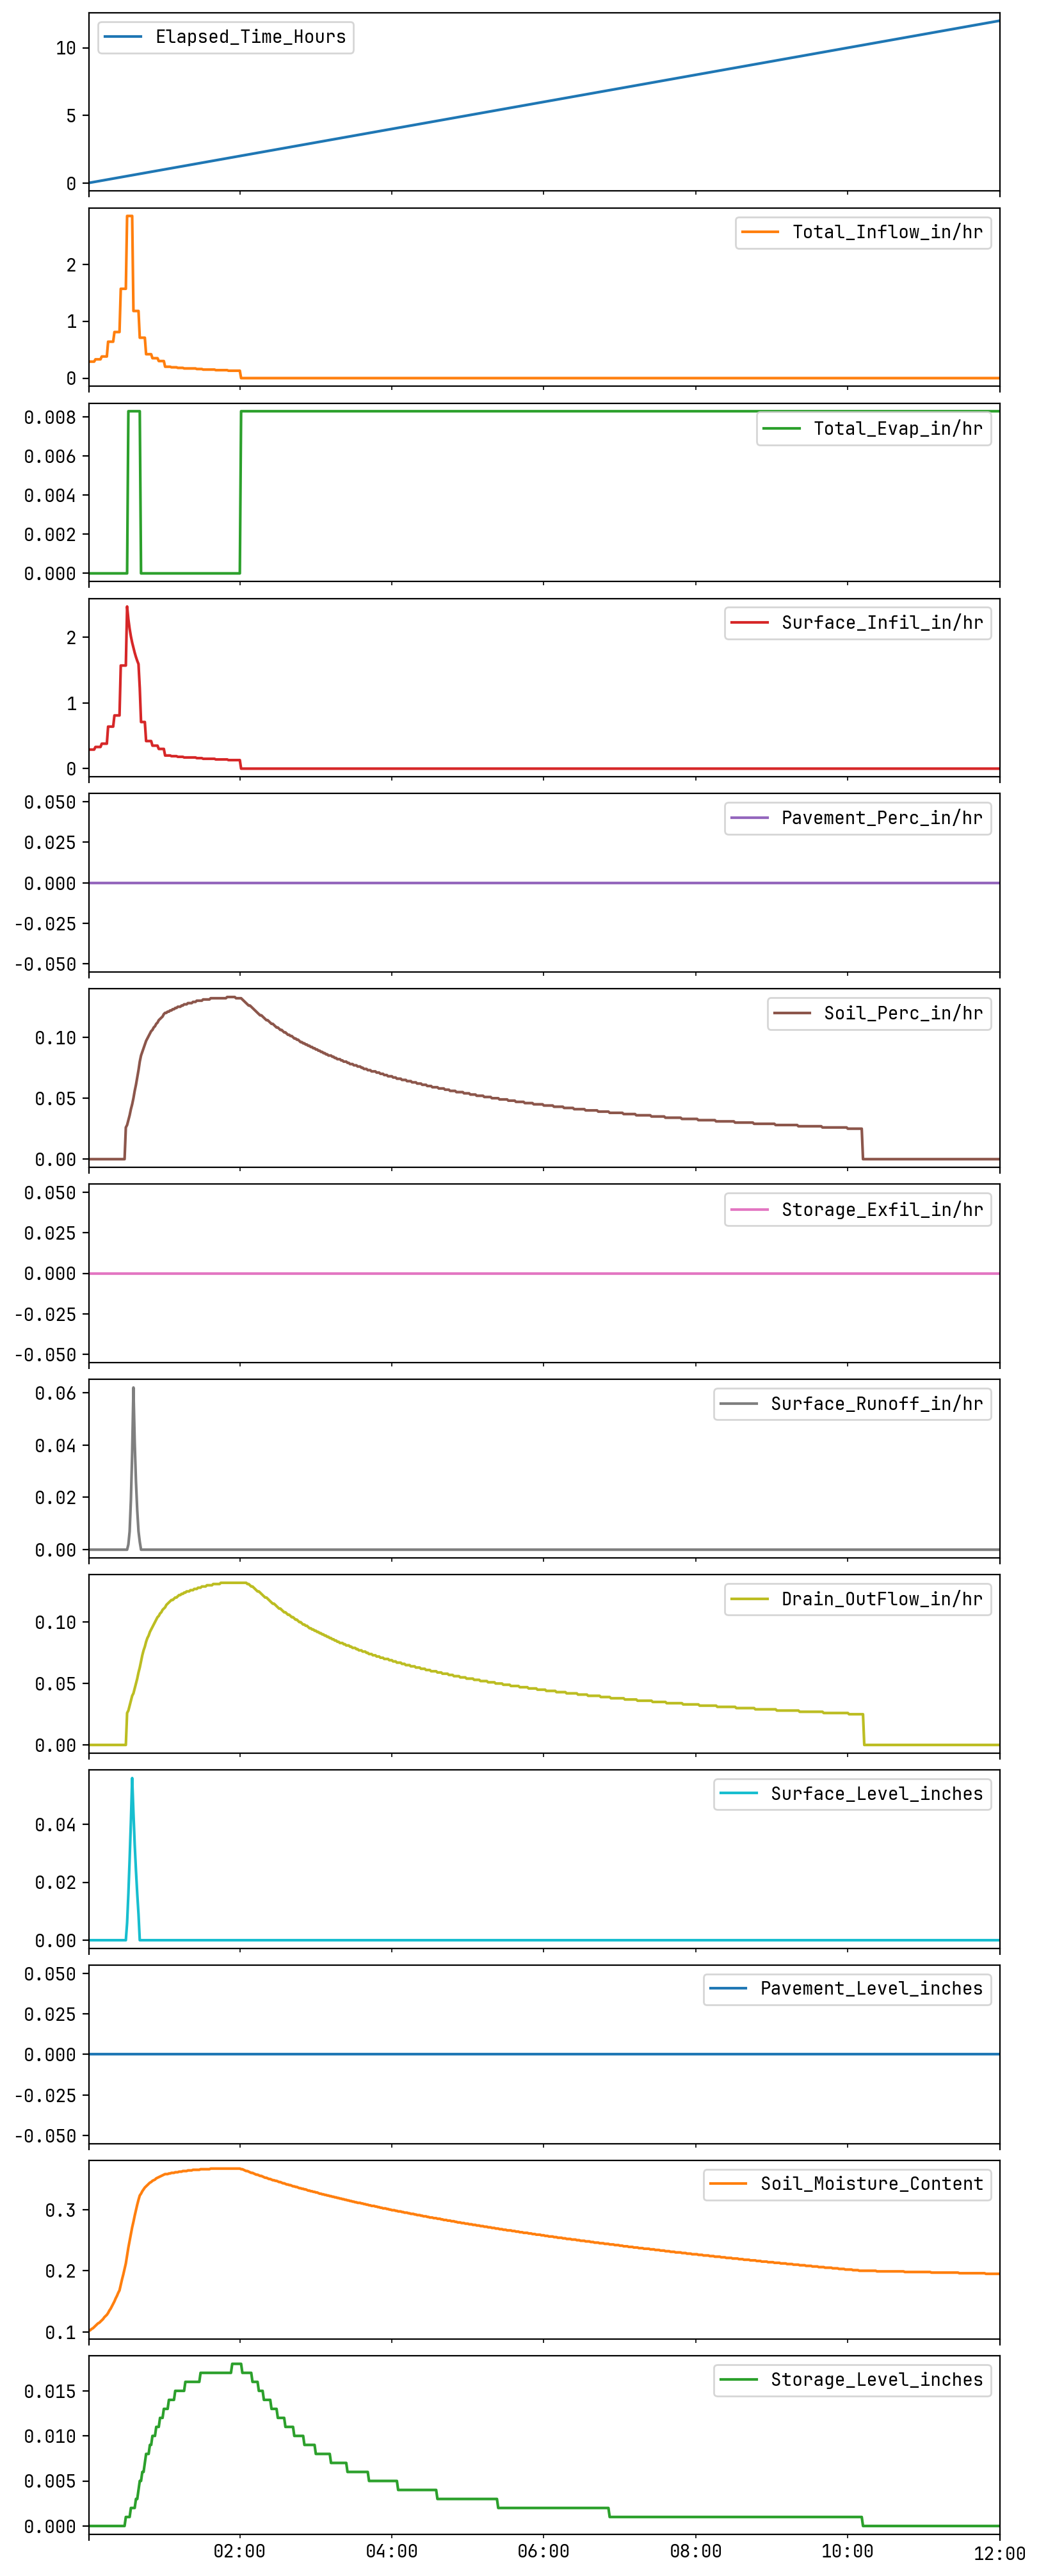

In [59]:
lid_rpt[('S5', 'GreenRoof')].plot(subplots=True, figsize=(8, 20))